In [88]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("reading_data/Hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [19]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]],["League_dum","Division_dum","NewLeague_dum"])

In [20]:
dms

,League_dum_A,League_dum_N,Division_dum_E,Division_dum_W,NewLeague_dum_A,NewLeague_dum_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [13]:
y = df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [14]:
X_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [21]:
X = pd.concat([X_,dms],axis = 1)

In [22]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_dum_A,League_dum_N,Division_dum_E,Division_dum_W,NewLeague_dum_A,NewLeague_dum_N
1,315,81,7,24,38,39,14,3449,835,69,...,375,632,43,10,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,263,880,82,14,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,354,200,11,3,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,33,805,40,4,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,194,282,421,25,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,138,325,9,3,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,875,313,381,20,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,146,37,113,7,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,332,1314,131,12,1,0,1,0,1,0


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

In [66]:
model = Ridge(alpha=0.1).fit(X_train,y_train)

In [60]:
model.coef_

array([ -1.50160543,   7.47077827,   4.67976502,  -2.85742792,
        -1.38583069,   5.54240518,   7.78966188,  -0.22592882,
         0.08363679,  -0.51723793,   1.69814166,   0.96017353,
        -0.81439707,   0.24866026,   0.22445998,  -0.61426263,
       -42.35301675,  42.35301675,  54.06330484, -54.06330484,
        20.94299759, -20.94299759])

In [61]:
model.intercept_

-15.089525814792637

In [67]:
lambdalar= 10**np.linspace(10,-1,50)*0.5

In [69]:
model2= Ridge()
coefficients = []
for i in lambdalar:
    model2.set_params(alpha=i)
    model2.fit(X_train,y_train)
    coefficients.append(model2.coef_)
    

In [42]:
coefficients

[array([ -1.81067217,   8.8738781 ,   7.09590765,  -3.308965  ,
         -2.00095056,   5.40320598,   7.1820679 ,  -0.13006454,
         -0.25387653,  -0.70846357,   1.8130741 ,   0.76977733,
         -0.67643706,   0.2621102 ,   0.26449622,  -0.37321916,
        -38.09129845,  38.09129845,  45.07077236, -45.07077236,
          8.00852468,  -8.00852468]),
 array([ -1.81008395,   8.87288352,   7.10051145,  -3.3095584 ,
         -2.00285264,   5.40362016,   7.18960309,  -0.1301727 ,
         -0.25315688,  -0.70677383,   1.81268546,   0.76911871,
         -0.67660209,   0.26209342,   0.26454894,  -0.37504806,
        -38.33807545,  38.33807545,  45.17107451, -45.17107451,
          8.21518693,  -8.21518693]),
 array([ -1.80948849,   8.87187048,   7.10512112,  -3.31015119,
         -2.00475717,   5.40403728,   7.19718816,  -0.13028262,
         -0.25242742,  -0.70506315,   1.81229399,   0.7684518 ,
         -0.67676936,   0.2620767 ,   0.26460294,  -0.37692259,
        -38.58941996,  38.58

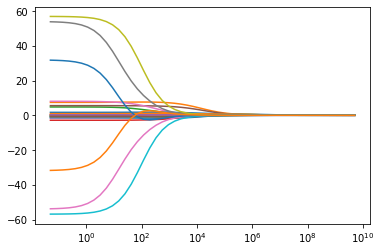

In [70]:
ax = plt.gca()
ax.plot(lambdalar,coefficients)
ax.set_xscale("log")

**PREDICT**

In [72]:
model3 = Ridge().fit(X_train,y_train)

In [92]:
y_pred = model3.predict(X_train)

In [93]:
y_pred[:10]

array([ 186.71802344,  276.29846082,  611.05745172,  641.21513938,
        699.65056292,  139.07763844, 1149.14197911, 1815.65279171,
        417.74682364,  891.71064024])

In [94]:
y_test[:10]

148    850.000
154    277.500
318    875.000
279    150.000
88     260.000
307    277.500
221    210.000
268    140.000
10     517.143
132    325.000
Name: Salary, dtype: float64

In [95]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

291.8331248944232

In [96]:
np.sqrt(np.mean(-cross_val_score(model3,X_train,y_train, cv=10, scoring = "neg_mean_squared_error")))

340.0557014248099